In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#先随机生成均匀分布的一堆粒子,有4个参数（2个位置，2个速度）

A=np.zeros((4,1000))#初始化一个4*1000的ndarray，认为初始速度是零，于是全部取0，只对两个位置参数进行随机生成的操作

A[0:2,:] = np.random.uniform(-50,50,(2,1000))
#随机在盒子里按均匀分布撒粒子，黑洞看作原点

In [19]:
def onestep(X):
    t=np.random.uniform(0, 2*np.pi, 1000)
    r=np.random.uniform(0,1,1000)
    
    mask=(X[0]**2+X[1]**2)>=0.01#先看看此刻它是不是在黑洞附近
    
    #位置变化
    X[0]=X[0]+r*np.cos(t)+X[2]*0.001
    X[1]=X[1]+r*np.sin(t)+X[3]*0.001
    
    #如果不在黑洞附近就要加速

    X[2][mask]=X[2][mask]-0.001*10*X[0][mask]/((X[0][mask]**2+X[1][mask]**2)**1.5)
    X[3][mask]=X[3][mask]-0.001*10*X[1][mask]/((X[0][mask]**2+X[1][mask]**2)**1.5)

In [20]:
#像这种每一步都依赖上一步，我也不知道怎么避免循环……
for i in range(0,100000):
    onestep(A)

In [21]:
A

array([[-1.10377335e+02,  1.70311609e+01,  6.20173441e+01, ...,
        -1.16276871e+02, -5.41052799e+01,  5.58055884e+00],
       [-4.13925622e+01, -3.13784558e+02,  5.96257477e+01, ...,
         1.47195183e+02, -1.11001503e+02, -8.79524933e+01],
       [-1.20279082e+00, -7.78389785e-02,  1.77314296e-01, ...,
         8.58501950e-02,  1.04713664e-01,  2.06471786e+00],
       [ 3.35396128e-01, -6.64657189e-02,  1.64847467e-01, ...,
        -1.12635634e-01, -1.89949073e-01, -2.37571584e-01]])

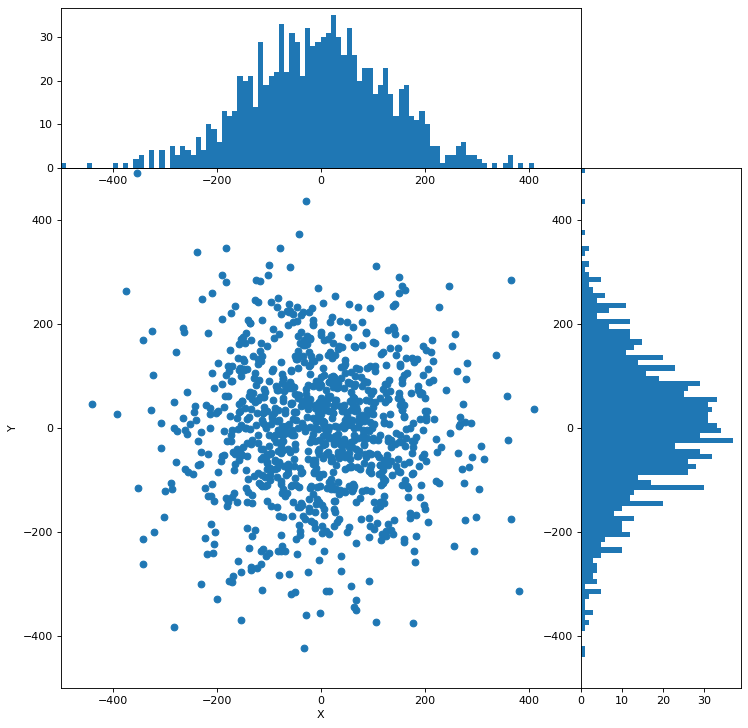

In [22]:
plt.figure(1, figsize=(10, 10),dpi=80)

ax0= plt.axes([0.1,0.1,0.65,0.65])
axhx= plt.axes([0.1,0.75,0.65,0.2])
axhy = plt.axes([0.75,0.1,0.2,0.65])

ax0.set_xlabel('X')
ax0.set_ylabel('Y')

#因为有大量粒子已经扩散到了盒子外，故没有按题意只画100*100内，而是扩大了范围
ax0.set_xlim((-500,500))
ax0.set_ylim((-500,500))
axhx.set_xlim((-500,500))
axhy.set_ylim((-500,500))
#散点图
ax0.scatter(A[0],A[1])
#直方图
bins = np.arange(-500, 500+10, 10)
axhx.hist(A[0], bins=bins)
axhy.hist(A[1], bins=bins, orientation='horizontal')


plt.savefig('particles')

In [9]:
import matplotlib.tri as tri

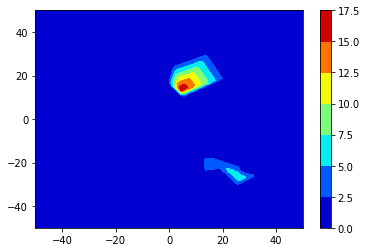

In [30]:
fig=plt.figure()
x=np.linspace(-50,50,100)
y=np.linspace(-50,50,100)

E=1/2*(A[2]**2+A[3]**2)

triang = tri.Triangulation(A[0], A[1])
interpolator = tri.LinearTriInterpolator(triang, E)
X, Y=np.meshgrid(x, y)

Z = interpolator(X, Y)

CS=plt.contourf(X, Y, Z, cmap='jet')

plt.colorbar(CS)
plt.savefig('等高线')